# Разработка системы предупреждения аварий на каршеринге

### Проект "Система оценки риска ДТП по выбранному маршруту движения."

Необходимо создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность
ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, 
система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.
Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.


Данные находятся в файле /datasets/6_class.csv. 


***Характеристики / признаки***

 - collisions — общая информация о ДТП. Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
 
 - parties — информация об участниках ДТП. Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.

- vehicles — информация о пострадавших машинах. Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.




### Основные этапы работы будут такие:

 - ***Шаг 1. Загрузите таблицы sql.***
 
 
 - ***Шаг 2. Проведение первичного исследования таблиц***
 Проверка соответствует ли количество таблиц условию задачи; Имеется ли общий ключ для связи таблиц. Для осмотра таблиц будем использовать sql-запрос.
 
 
 - ***Шаг 3. Статистический анализ факторов ДТП***
 Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем период наблюдений (таблица collisions).
Создадим sqlпрос; Построим график и сделаем вывод.

Проведим анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать collisions и parties); Найдем самые частые причины ДТП (таблица parties).
!!!Необходимо создать не менее шести задач для коллег. Опирайтесь на примеры и таблицы. 
Пропишите порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:
Создайте sql-запрос;
Постройте график;
Сделайте вывод.


 - ***Шаг 4. Создайте модель для оценки водительского риска***
Подготовим набор данных на основе первичного предположения заказчика:
 
 * Выберем тип виновника — только машина (car). 
 * Возьмем случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
 * Для моделирования возьмем данные только за 2012 год.
 * Подготовка исходной таблицы будет проводиться с помощью sql-запроса.

 * Проведем первичный отбор факторов, необходимых для модели.
 * Изучим описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП, аргументируем свой выбор. 
 * Проведим статистическое исследование отобранных факторов.
 * По результам исследовательского анализа внесим корректировки, если они нужны. Сделаем вывод.
 * Если необходимо, проведем категоризацию и масштабирование исходных данных. 
 * Подготовим обучающую и тестовую выборки.


 - ***Шаг 5. Найдем лучшую модель***
Смоделируем не менее 3-х типов моделей с перебором гиперпараметров.
1–2 модели из спринта 2;
1–2 модели из спринта 3.

Выберем  метрику для оценки модели, исходя из поставленной бизнесом задачи. Обоснуем свой выбор.
Оформим вывод в виде сравнительной таблицы.


 - ***Шаг 6. Проверим лучшую модель в работе***
Проведем графический анализ «Матрица ошибок». Выведем полноту и точность на график.
Проанализиуем важность основных факторов, влияющих на вероятность ДТП.
Для одного из выявленных важных факторов проведем дополнительное исследование:
Покажем график зависимости фактора и целевой переменной.
Предложим чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.


 - ***Шаг 7. Общий вывод по модели***
Кратко опишем лучшую модель.
Сделаем вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
Какие факторы ещё необходимо собирать, чтобы улучшить модель?

## Подключитесь к базе. Загрузите таблицы sql

Тут будут все импорты

In [1]:
!pip install sqlalchemy -q
!pip install psycopg2 -q
!pip install catboost -q
!pip install xgboost -q
!pip install lightgbm -q
!pip install shap -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
import math
import random
import time 
import lightgbm as lgb
import shap
import catboost
import warnings
import xgboost
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, fbeta_score, make_scorer,make_column_selector, precision_recall_curve, PrecisionRecallDisplay
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import make_pipeline
from catboost import CatBoostClassifier

In [3]:

db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

#создаем соединение
engine = create_engine(connection_string)

## Проведите первичное исследование таблиц

In [4]:
query = '''
SELECT table_name
FROM information_schema.tables
WHERE table_type = 'BASE TABLE'
''' 
query

"\nSELECT table_name\nFROM information_schema.tables\nWHERE table_type = 'BASE TABLE'\n"

In [5]:
# КОД РЕВЬЮЕРА
query = '''
SELECT table_name
FROM information_schema.tables
WHERE table_type = 'BASE TABLE'
''' 
pd.read_sql_query(query, con = engine)

,table_name
0,case_ids
1,collisions
2,parties
3,vehicles
4,pg_foreign_table
...,...
63,sql_implementation_info
64,sql_languages
65,sql_packages
66,sql_sizing


In [6]:
#извлечение результатов SQL-запроса - collisions (информация о происшествиях)

query1 = '''
Select *
FROM collisions;
''' 
collisions = pd.read_sql_query(query1, con = engine)
print(collisions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   case_id                      1400000 non-null  object 
 1   county_city_location         1400000 non-null  object 
 2   county_location              1400000 non-null  object 
 3   distance                     1400000 non-null  float64
 4   direction                    1059358 non-null  object 
 5   intersection                 1387781 non-null  float64
 6   weather_1                    1392741 non-null  object 
 7   location_type                518779 non-null   object 
 8   collision_damage             1400000 non-null  object 
 9   party_count                  1400000 non-null  int64  
 10  primary_collision_factor     1391834 non-null  object 
 11  pcf_violation_category       1372046 non-null  object 
 12  type_of_collision            1388176 non-n

In [7]:
print(collisions.head())

   case_id county_city_location county_location  distance direction  \
0  4083072                 1942     los angeles     528.0     north   
1  4083075                 4313     santa clara       0.0      None   
2  4083073                 0109         alameda       0.0      None   
3  4083077                 0109         alameda       0.0      None   
4  4083087                 4313     santa clara       0.0      None   

   intersection weather_1 location_type collision_damage  party_count  \
0           0.0    cloudy       highway     small damage            2   
1           1.0     clear          None     small damage            1   
2           1.0     clear          None          scratch            2   
3           1.0     clear          None          scratch            2   
4           1.0     clear          None          scratch            2   

  primary_collision_factor   pcf_violation_category type_of_collision  \
0   vehicle code violation       unsafe lane change         s

In [8]:
#извлечение результатов SQL-запроса - Parties (описание участников происшествия)

query2 = '''
Select *
FROM Parties;
''' 
parties = pd.read_sql_query(query2, con = engine)
print(parties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752408 entries, 0 to 2752407
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   case_id              object 
 2   party_number         int64  
 3   party_type           object 
 4   at_fault             int64  
 5   insurance_premium    float64
 6   party_sobriety       object 
 7   party_drug_physical  object 
 8   cellphone_in_use     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 189.0+ MB
None


In [9]:
#извлечение результатов SQL-запроса -Vehicles (Описание автомобиля)

query3 = '''
Select *
FROM Vehicles;
''' 
vehicles = pd.read_sql_query(query3, con = engine)
print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021234 entries, 0 to 1021233
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1021234 non-null  int64  
 1   case_id               1021234 non-null  object 
 2   party_number          1021234 non-null  int64  
 3   vehicle_type          1021234 non-null  object 
 4   vehicle_transmission  997575 non-null   object 
 5   vehicle_age           996652 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 46.7+ MB
None


Мы провели выгрузку таблиц из SQL. Количество таблиц равно 3:

1) collisions (информация о происшествиях)

2) Parties (описание участников происшествия)

3) Vehicles (Описание автомобиля)

У все трех таблиц общий ключ - case_id по нему и будум проведить соединие таблиц для анализа.

In [10]:
#оценим наличие полных дубликатов
print(collisions.duplicated().sum())


0


In [11]:
#оценим наличие полных дубликатов
print(parties.duplicated().sum())

0


In [12]:
#оценим наличие полных дубликатов
print(vehicles.duplicated().sum())

0


***Вывод:***
Как видно из информации выше -  есть пропуски в данных по информации и происшествиях и описанию автомобиля. Их покапредоборабатывать пропуски не будем, но учтем, что они есть.
Полных дубликатов нет. 

***Проверим наличие неявных дубликатов***

In [13]:
collisions['direction'].unique()

print(collisions['direction'].unique())

['north' None 'south' 'west' 'east']


In [14]:
collisions['intersection'].unique()
 
print(collisions['intersection'].unique())

[ 0.  1. nan]


In [15]:
collisions['weather_1'].unique()

print(collisions['weather_1'].unique())

['cloudy' 'clear' 'raining' None 'fog' 'snowing' 'other' 'wind']


In [16]:
collisions['location_type'].unique()

print(collisions['location_type'].unique())

['highway' None 'ramp' 'intersection']


In [17]:
collisions['collision_damage'].unique()


array(['small damage', 'scratch', 'severe damage', 'middle damage',
       'fatal'], dtype=object)

In [18]:
collisions['party_count'].unique()

array([ 2,  1,  3,  5,  4,  8,  6,  7,  9, 10, 11, 15, 14, 21, 13, 12, 20,
       27], dtype=int64)

In [19]:
collisions['primary_collision_factor'].unique()

print(collisions['primary_collision_factor'].unique())

['vehicle code violation' None 'unknown' 'other improper driving'
 'other than driver' 'fell asleep']


In [20]:
collisions['pcf_violation_category'].unique()

print(collisions['pcf_violation_category'].unique())

['unsafe lane change' 'improper passing' 'improper turning'
 'automobile right of way' 'speeding' None 'dui'
 'traffic signals and signs' 'wrong side of road' 'unknown'
 'following too closely' 'other hazardous violation'
 'unsafe starting or backing' 'other improper driving'
 'pedestrian right of way' 'hazardous parking'
 'other than driver (or pedestrian)' 'fell asleep' 'pedestrian violation'
 'other equipment' 'lights' 'impeding traffic' 'brakes' 'pedestrian dui']


In [21]:
collisions['type_of_collision'].unique()

print(collisions['type_of_collision'].unique())

['sideswipe' 'hit object' 'broadside' 'rear end' None 'overturned'
 'head-on' 'other']


In [22]:
collisions['motor_vehicle_involved_with'].unique()
 
print(collisions['motor_vehicle_involved_with'].unique())

['other motor vehicle' 'fixed object' None 'non-collision'
 'parked motor vehicle' 'bicycle' 'motor vehicle on other roadway'
 'other object' 'train' 'animal']


In [23]:
collisions['road_surface'].unique()

print(collisions['road_surface'].unique())

['wet' 'dry' None 'slippery' 'snowy']


In [24]:
collisions['road_condition_1'].unique()

print(collisions['road_condition_1'].unique())

['normal' None 'construction' 'other' 'obstruction' 'holes'
 'loose material' 'flooded' 'reduced width']


In [25]:
collisions['lighting'].unique()

print(collisions['lighting'].unique())

['daylight' 'dark with street lights' 'dusk or dawn' None
 'dark with no street lights' 'dark with street lights not functioning']


In [26]:
collisions['control_device'].unique()
 
print(collisions['control_device'].unique())

['none' 'functioning' None 'not functioning' 'obscured']


In [27]:
collisions['collision_date'].unique()

print(collisions['collision_date'].unique())

[datetime.date(2009, 1, 22) datetime.date(2009, 1, 3)
 datetime.date(2009, 1, 11) ... datetime.date(2013, 3, 26)
 datetime.date(2013, 3, 20) datetime.date(2013, 3, 4)]


In [28]:
collisions['collision_time'].unique()

print(collisions['collision_time'].unique())

[datetime.time(7, 25) datetime.time(2, 26) datetime.time(3, 32) ...
 datetime.time(3, 16) datetime.time(3, 56) datetime.time(3, 21)]


In [29]:
vehicles['vehicle_transmission'].unique()

print(vehicles['vehicle_transmission'].unique())

['manual' 'auto' None]


In [30]:
vehicles['vehicle_age'].unique()

print(vehicles['vehicle_age'].unique())

[  3.   5.   9.  10.   4.  11.   1.   6.   8.   0.   2.   7.  nan  12.
  13.  15.  14.  16.  17. 161.  19.  18.  20.]


In [31]:
collisions.isnull().sum()

case_id                             0
county_city_location                0
county_location                     0
distance                            0
direction                      340642
intersection                    12219
weather_1                        7259
location_type                  881221
collision_damage                    0
party_count                         0
primary_collision_factor         8166
pcf_violation_category          27954
type_of_collision               11824
motor_vehicle_involved_with      6819
road_surface                    13093
road_condition_1                11988
lighting                         8593
control_device                   8407
collision_date                      0
collision_time                  12308
dtype: int64

In [32]:
parties.isnull().sum()

id                           0
case_id                      0
party_number                 0
party_type                3622
at_fault                     0
insurance_premium       405402
party_sobriety           73955
party_drug_physical    2320120
cellphone_in_use        511637
dtype: int64

In [33]:
vehicles.isnull().sum()

id                          0
case_id                     0
party_number                0
vehicle_type                0
vehicle_transmission    23659
vehicle_age             24582
dtype: int64

Пропуски в данных обработаны, отсутствие дубликатов проверно. Можем перейти  к статистическому анализу информации.

##  Проведите статистический анализ факторов ДТП

Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем период наблюдений (таблица collisions). Создадим sqlпрос; Построим график и сделаем вывод.
Проведим анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать collisions и parties); Найдем самые частые причины ДТП (таблица parties). !!!Необходимо создать не менее шести задач для коллег. Опирайтесь на примеры и таблицы. Пропишите порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка: Создайте sql-запрос; Постройте график; Сделайте вывод.

***1) Выясним в какие месяцы происходит наиболее число аварий***

Для этого нам понадобится информация из базы данных Collisions

Сначала посмотрим на статистику по ДТП в разрезе год и месяц:

In [34]:
query4_3 = '''


WITH f AS
(SELECT ROW_NUMBER() OVER (PARTITION BY EXTRACT (YEAR FROM CAST(collision_date AS DATE)) ORDER BY EXTRACT (MONTH FROM CAST(collision_date AS DATE)) DESC),
       EXTRACT (YEAR FROM CAST(collision_date AS DATE)) AS year,
       EXTRACT (MONTH FROM CAST(collision_date AS DATE)) AS month,
       COUNT(CASE_ID) AS count
       
FROM collisions
GROUP BY EXTRACT (YEAR FROM CAST(collision_date AS DATE)), EXTRACT (MONTH FROM CAST(collision_date AS DATE))
ORDER BY EXTRACT (YEAR FROM CAST(collision_date AS DATE)))

SELECT year,
       month, 
       count
FROM f
;

'''
#WHERE row_number < 4 AND road_condition_1 != 'other' AND road_condition_1 != 'None'

query4_3 = pd.read_sql_query(query4_3, con = engine)
query4_3

,year,month,count
0,2009.0,12.0,36060
1,2009.0,11.0,34562
2,2009.0,10.0,37835
3,2009.0,9.0,35555
4,2009.0,8.0,34508
5,2009.0,7.0,35161
6,2009.0,6.0,34202
7,2009.0,5.0,36916
8,2009.0,4.0,35239
9,2009.0,3.0,36648


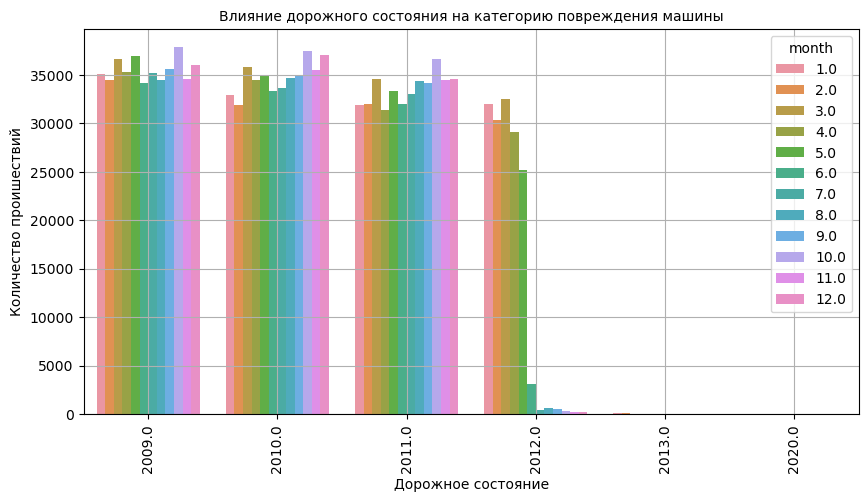

In [35]:
#график кол-ва случаев ДПТ по годам и месяцам
plt.figure(figsize=(10, 5))
sns.barplot(data=query4_3, x="year", y="count", hue = "month")
plt.title('Влияние дорожного состояния на категорию повреждения машины', fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Дорожное состояние')
plt.ylabel('Количество проишествий')
plt.grid(True)
plt.show()

***Вывод***

Данные по 12 месяцам есть за период 2009-2011, за 2012 есть за 5 месяца, потом кол-вол-во данных срезко уменьшается. Поэтому для анализа кол-ва аварий по месяцам возьмем период 2009-2011 год.

In [36]:
query4 = '''
Select EXTRACT (MONTH FROM CAST(collision_date AS DATE)) AS month,
COUNT(case_id) AS number
FROM collisions
WHERE EXTRACT (YEAR FROM CAST(collision_date AS DATE)) < '2012'
GROUP BY EXTRACT (MONTH FROM CAST(collision_date AS DATE));
''' 
nubmer_of_collisions_by_month = pd.read_sql_query(query4, con = engine)
print(nubmer_of_collisions_by_month)

    month  number
0     1.0   99880
1     2.0   98373
2     3.0  107036
3     4.0  101032
4     5.0  105148
5     6.0   99531
6     7.0  101835
7     8.0  103467
8     9.0  104649
9    10.0  111933
10   11.0  104517
11   12.0  107745


Text(0.5, 1.0, 'Количество ДТП по месяцам за 2009-2011 гг.')

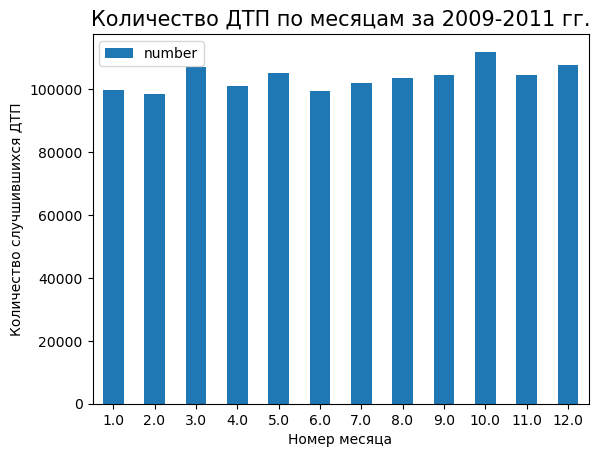

In [37]:
#построим график, кторый плокажет кол-во ДТП по месяцам

nubmer_of_collisions_by_month.plot.bar('month', 'number', rot=0)
plt.xticks(rotation=0)
plt.xlabel('Номер месяца')
plt.ylabel('Количество случшившихся ДТП')
plt.title('Количество ДТП по месяцам за 2009-2011 гг.', fontsize=15)

***Вывод по графику:***
По графику можно отметить, что наиболее число ДТП случается в период с марте, мае, в октябре. Меньше всего происшествий в июне. Рост случаев ДТП  марте и октябре это скорее всего, связано с неблагоприятными погодными условиями - снегом и дождем в межсезонье,когда не все водители успевают сменить сезонную резину или еще не привыкли к изменившимся погодным условиям и необходимости увеличить дистанцию при движении. 

***2) Проведим анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП*** 

Для этого необходимо связать 2 таблицы collisions и parties по ключу case_id.

In [38]:
query5 = '''

WITH f AS
(SELECT ROW_NUMBER() OVER (PARTITION BY ROAD_CONDITION_1 ORDER BY COUNT(CASE_ID) DESC),
       ROAD_CONDITION_1,
       COLLISION_DAMAGE,
       COUNT(CASE_ID)
       
FROM collisions
GROUP BY ROAD_CONDITION_1, COLLISION_DAMAGE
ORDER BY ROAD_CONDITION_1)

SELECT ROAD_CONDITION_1,
       COLLISION_DAMAGE, 
       count
FROM f
;

'''
#WHERE row_number < 4 AND road_condition_1 != 'other' AND road_condition_1 != 'None'

query5 = pd.read_sql_query(query5, con = engine)
query5

,road_condition_1,collision_damage,count
0,construction,small damage,12510
1,construction,scratch,4421
2,construction,middle damage,1858
3,construction,severe damage,369
4,construction,fatal,174
5,flooded,small damage,682
6,flooded,scratch,272
7,flooded,middle damage,134
8,flooded,severe damage,20
9,flooded,fatal,6


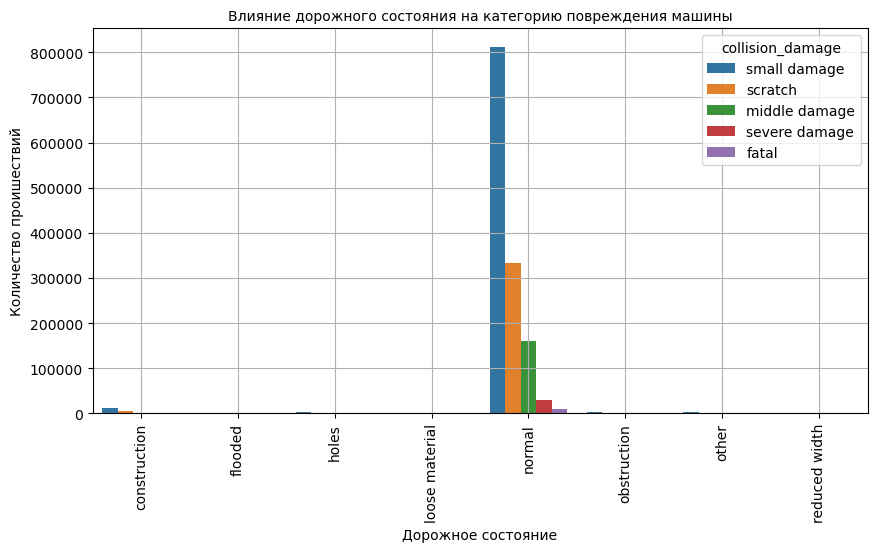

In [39]:
#график корреляции уровня повреждений машины от состояния дороги
plt.figure(figsize=(10, 5))
sns.barplot(data=query5, x="road_condition_1", y="count", hue = 'collision_damage')
plt.title('Влияние дорожного состояния на категорию повреждения машины', fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Дорожное состояние')
plt.ylabel('Количество проишествий')
plt.grid(True)
plt.show()

***Вывод:***

Большая часть ДТП происходит на дорогах  в номальном состоянии, следом с очень большим отрывов идут ДТП над дорогах, где происходит ремонт. Рекомендация водителяи ездить в навигатором, даже если они хорошо знают маршрут, чтобы им поступали предупреждения, на каком участке дороги идет ремонт и рекомендации по маршруту для перестроения или объезда.

***3) Анализ категории нарушений***

In [40]:
query6 = '''

SELECT pcf_violation_category AS violation_category,
COUNT(case_id)
FROM collisions
WHERE pcf_violation_category!= 'unknown' 
AND pcf_violation_category!= 'None'
GROUP BY pcf_violation_category
ORDER BY COUNT(case_id) DESC
LIMIT 15;

'''

query6 = pd.read_sql_query(query6, con = engine)
query6

,violation_category,count
0,speeding,438439
1,improper turning,238987
2,automobile right of way,158291
3,dui,110476
4,unsafe lane change,93962
5,traffic signals and signs,72751
6,unsafe starting or backing,55674
7,wrong side of road,33631
8,following too closely,30033
9,other than driver (or pedestrian),29780


Text(0.5, 1.0, 'Анализ категории нарушений')

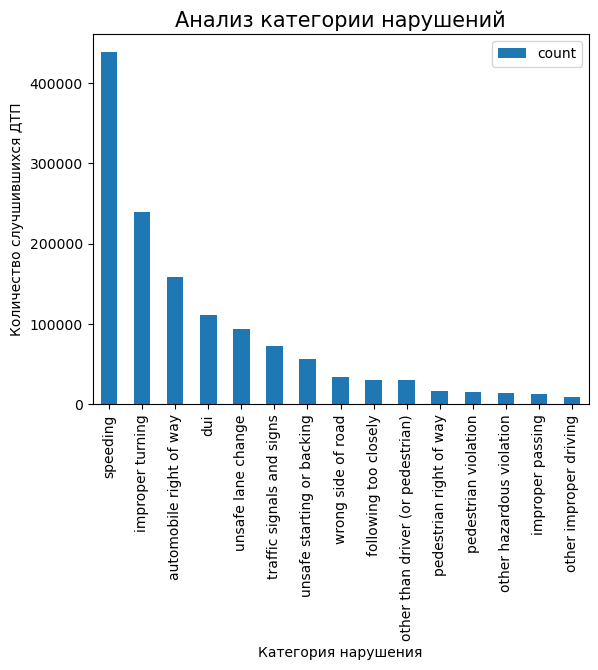

In [41]:
#построим график, выбрано только 15 категорий, потому, что цифры по остальным незначительные

#values1 = query6['violation_category']
#values2 = query6['count']
query6.plot.bar('violation_category', 'count', rot=0)
plt.xticks(rotation=90)
plt.xlabel('Категория нарушения')
plt.ylabel('Количество случшившихся ДТП')
plt.title('Анализ категории нарушений', fontsize=15)

***Вывод:***

По графику анализа категорий нарушений видно, что в тройку лидеров по нарушениям входят - превышение скорости, повороты в запрещенных местах и не уступание дороги. 

Система для снижения риска нарушений может выдавать рекомендации, снизить скорость или выдавать информацию по ограничениям скорости на соответствующем участке движения, и предупреждать водителя, что планируемый маневр (поворот, например) на данном участке запрещен.

## Задачи для коллег

***4) Виды аварий в зависимости от погодных условий***

In [42]:
query7 = '''

WITH f AS
(SELECT ROW_NUMBER() OVER (PARTITION BY COLLISION_DAMAGE ORDER BY COUNT(CASE_ID) DESC),
       COLLISION_DAMAGE,
       WEATHER_1,
       COUNT(CASE_ID)
       
FROM collisions
WHERE COLLISION_DAMAGE !='None'
AND WEATHER_1 != 'None'
GROUP BY COLLISION_DAMAGE, WEATHER_1
ORDER BY COLLISION_DAMAGE)

SELECT COLLISION_DAMAGE,
       WEATHER_1, 
       count
FROM f
WHERE row_number < 4;
;

'''

query7 = pd.read_sql_query(query7, con = engine)
query7

,collision_damage,weather_1,count
0,fatal,clear,8749
1,fatal,cloudy,1530
2,fatal,raining,328
3,middle damage,clear,137013
4,middle damage,cloudy,22176
5,middle damage,raining,5528
6,scratch,clear,278281
7,scratch,cloudy,49316
8,scratch,raining,14754
9,severe damage,clear,25375


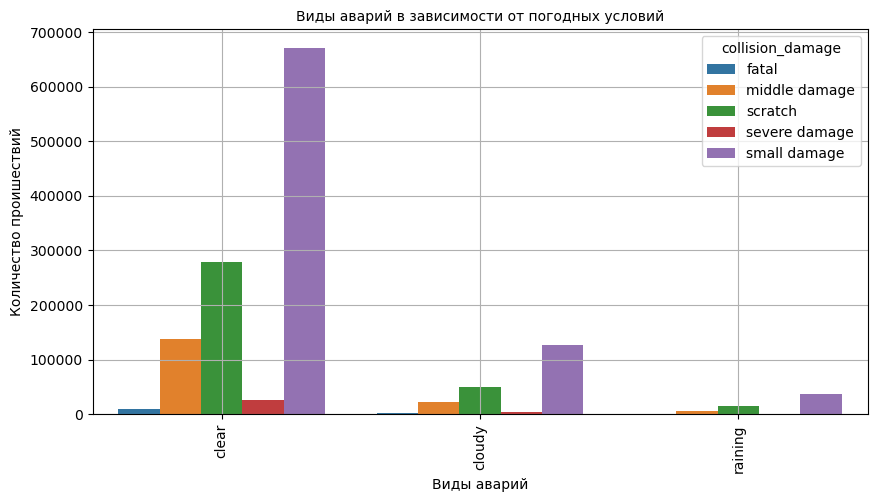

In [43]:
#Виды аварий в зависимости от погодных условий
plt.figure(figsize=(10, 5))
sns.barplot(data=query7, x="weather_1", y="count", hue = 'collision_damage')
plt.title('Виды аварий в зависимости от погодных условий', fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Виды аварий')
plt.ylabel('Количество проишествий')
plt.grid(True)
plt.show()

***Вывод***

Большинство ДТП случается в ясную поогоду, немного меньше в облачную и совсем мало в дождливую. Это может быть свяано с тем, что климат рассматривваемых регионов предполагает хорошую и ясную погоду большую часть года. А также люди склонны вести на дорогах более внимательно в дожливую погоду.

При этом в  большинстве ДТП - случаютмся небольшие повреждения или царапины.

***5) Количество ДТП по регионам***

In [44]:
query8 = '''

SELECT county_location,
COUNT(case_id)
FROM collisions
WHERE county_location!= 'None'
GROUP BY county_location
ORDER BY COUNT(case_id) DESC
LIMIT 20;

'''

query8 = pd.read_sql_query(query8, con = engine)
query8

,county_location,count
0,los angeles,433809
1,orange,118276
2,san bernardino,79382
3,san diego,78391
4,riverside,69328
5,alameda,64553
6,sacramento,56988
7,santa clara,50786
8,ventura,32335
9,contra costa,31492


Text(0.5, 1.0, 'Количество ДТП по регионам')

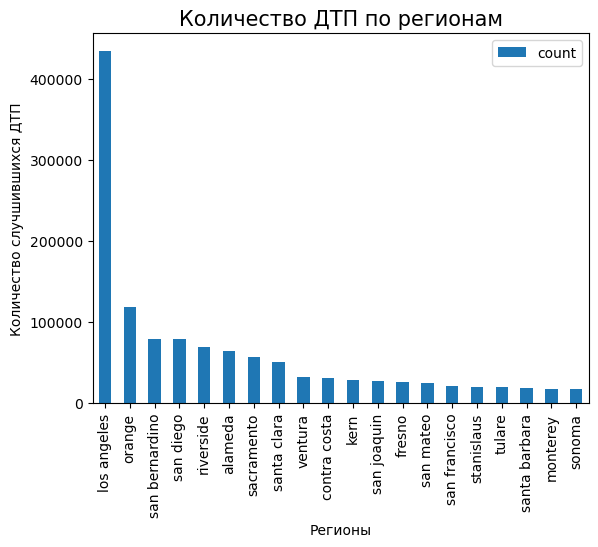

In [45]:
#построим график, кторый плокажет кол-во ДТП по регионам

query8.plot.bar('county_location', 'count', rot=0)
plt.xticks(rotation=90)
plt.xlabel('Регионы')
plt.ylabel('Количество случшившихся ДТП')
plt.title('Количество ДТП по регионам', fontsize=15)

***Вывод:***

Больше всего аварий случается в Los Angeles, Orange, San Bernrdino.
Чтобы понять возможные причины этого рассмотрим ниже состоянии дорог по регионам и самые частые виды нарушений. 

***6) Состояние дорог по регионам ДТП***

In [46]:
query9 = '''

WITH a AS 
(SELECT COUNTY_LOCATION,
       COUNT(CASE_ID)
FROM collisions
GROUP BY COUNTY_LOCATION
ORDER BY COUNT(CASE_ID) DESC),

f AS

(SELECT ROW_NUMBER() OVER (PARTITION BY COUNTY_LOCATION ORDER BY COUNT(CASE_ID) DESC),
        COUNTY_LOCATION,
        ROAD_CONDITION_1,
        COUNT(CASE_ID)
FROM collisions
GROUP BY COUNTY_LOCATION, ROAD_CONDITION_1
ORDER BY COUNTY_LOCATION)

SELECT county_location,
       road_condition_1,
       count
FROM f
WHERE row_number < 4 AND county_location IN (SELECT COUNTY_LOCATION
                                          FROM a
                                          LIMIT 10);

'''

query9 = pd.read_sql_query(query9, con = engine)
query9

,county_location,road_condition_1,count
0,alameda,normal,62043
1,alameda,construction,1058
2,alameda,None,483
3,contra costa,normal,30386
4,contra costa,construction,354
5,contra costa,None,226
6,los angeles,normal,421004
7,los angeles,construction,3871
8,los angeles,None,3651
9,orange,normal,114031


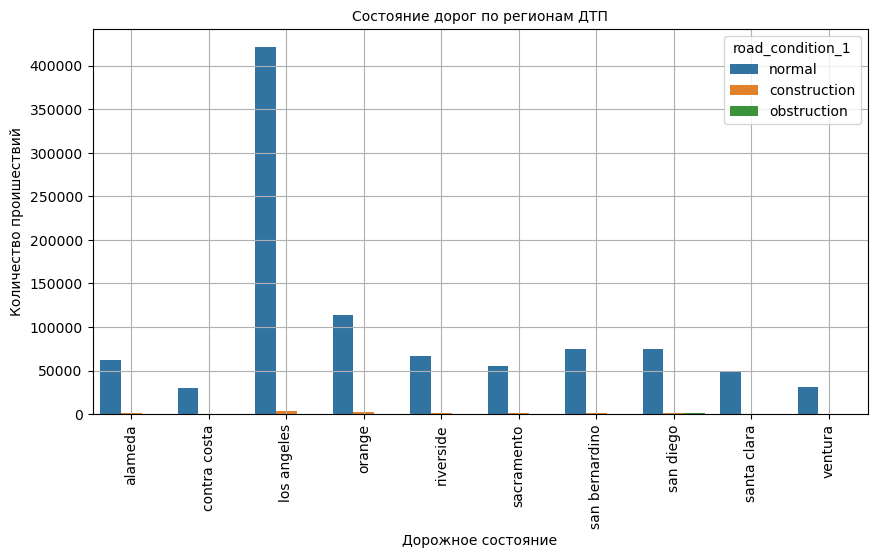

In [47]:
#график корреляции уровня повреждений машины от состояния дороги
plt.figure(figsize=(10, 5))
sns.barplot(data=query9, x="county_location", y="count", hue = 'road_condition_1')
plt.title('Состояние дорог по регионам ДТП', fontsize=10)
plt.xticks(rotation=90)
plt.xlabel('Дорожное состояние')
plt.ylabel('Количество проишествий')
plt.grid(True)
plt.show()

***Вывод:***

В целом по регионам нормальное состояние дорого. Но больше всего ремонтых работ проходят в Los Angeles и Orange, что может быть одной из частых причин ДТП, скорее всего водитель не успевает соориентироваться и вовремя перестроить свой маршрут. Изменить ситуацию помогут предупреждающие о ремонте банере, которые будут установлены за 1-2 км. до начала реконструкции, а также оповещение навигатора в машине о приближающемся опасном участке на дороге.

***7) Самые частые виды нарушений по регинам***

In [48]:
#Самые частые виды нарушений по регинам

query10= '''

WITH a AS 
(SELECT COUNTY_LOCATION,
       COUNT(CASE_ID)
FROM collisions
GROUP BY COUNTY_LOCATION
ORDER BY COUNT(CASE_ID) DESC),

f AS

(SELECT ROW_NUMBER() OVER (PARTITION BY COUNTY_LOCATION ORDER BY COUNT(CASE_ID) DESC),
        COUNTY_LOCATION,
        PCF_VIOLATION_CATEGORY,
        COUNT(CASE_ID)
FROM collisions
GROUP BY COUNTY_LOCATION, PCF_VIOLATION_CATEGORY
ORDER BY COUNTY_LOCATION)

SELECT county_location,
       PCF_VIOLATION_CATEGORY,
       count
FROM f
WHERE row_number < 5 AND county_location IN (SELECT COUNTY_LOCATION
                                          FROM a
                                          LIMIT 10);


'''

query10 = pd.read_sql_query(query10, con = engine)
query10

,county_location,pcf_violation_category,count
0,alameda,speeding,20721
1,alameda,improper turning,13408
2,alameda,unsafe lane change,5490
3,alameda,automobile right of way,5420
4,contra costa,speeding,9797
5,contra costa,improper turning,5343
6,contra costa,automobile right of way,2556
7,contra costa,dui,2450
8,los angeles,speeding,135566
9,los angeles,improper turning,58083


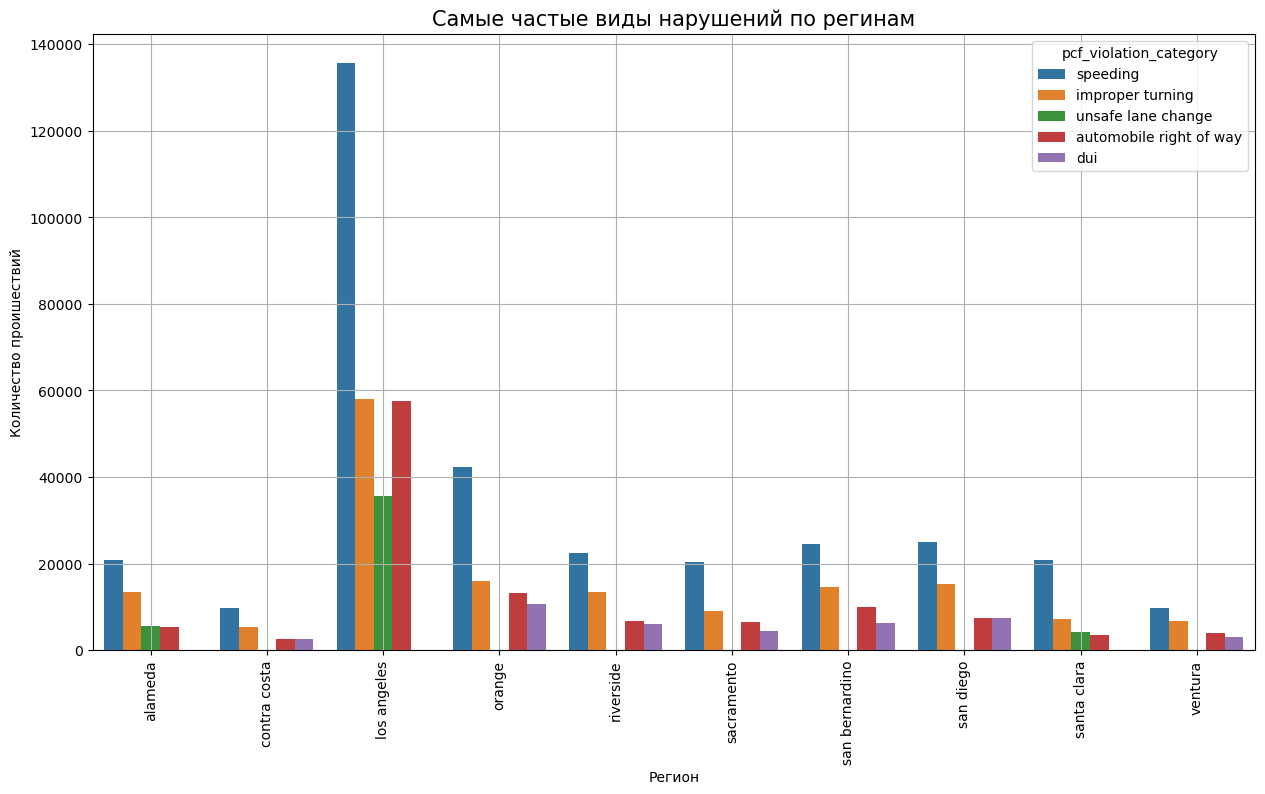

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(data=query10, x="county_location", y="count", hue = 'pcf_violation_category')
plt.title('Самые частые виды нарушений по регинам', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Регион')
plt.ylabel('Количество проишествий')
plt.grid(True)
plt.show()

***Вывод:***

ТТоп-3 самых частых нарушения:

1) превышение сокрости 

2) поворот в запрещенном месте

3) неуступка дороги


Скорее  всего в регионах-лидерах по количеству нарушений наиболее строгие правила по скоростному режиму и поворатам.
Чтобы сократить число нарушений, можно сделать оповещение от системы, когда водители въезжаю в данные регионы,  что  в тут работаеют строгие правила онтосительно скоростного режима и рекомнадовать следить за знаками на дороге и указаниями навигатора по рекомендованному скоростному режиму.

***8) Зависит ли кол-во ДТП от вида  коробки передач?***

In [50]:
#Самые частые виды нарушений по регинам
query8 = '''

SELECT v.VEHICLE_TRANSMISSION,
COUNT(c.case_id)
FROM collisions AS c
JOIN Vehicles as v ON c.case_id = v.case_id
WHERE v.VEHICLE_TRANSMISSION!= 'None'
GROUP BY v.VEHICLE_TRANSMISSION
ORDER BY COUNT(c.case_id) DESC;

'''

query8 = pd.read_sql_query(query8, con = engine)
query8

,vehicle_transmission,count
0,auto,502243
1,manual,495332


Text(0.5, 1.0, 'Количество ДТП в зависимости от типа КПП машины')

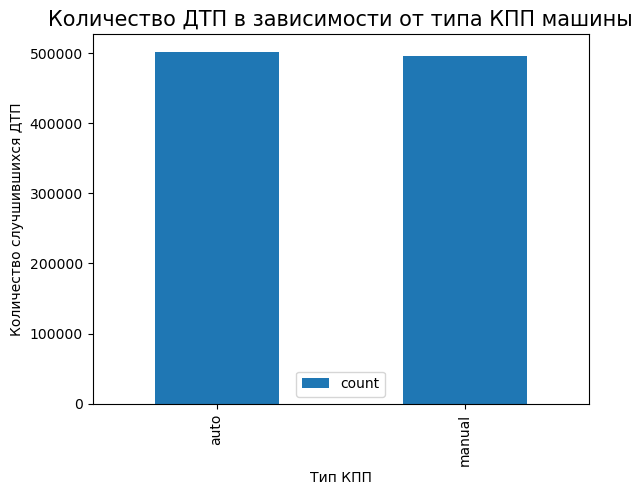

In [51]:
#проверкка наличия зависимости кол-ва ДТП от вида КПП.
query8.plot.bar('vehicle_transmission', 'count', rot=0)
plt.xticks(rotation=90)
plt.xlabel('Тип КПП')
plt.ylabel('Количество случшившихся ДТП')
plt.title('Количество ДТП в зависимости от типа КПП машины', fontsize=15)

***Вывод:***

По графику можно отметить, что число ДПТ у машин с автоматической и ручной коробкой передач почти одинаковой. Значит этот фактов не влияет на уровень аварий на дороге, гораздо важнее опыт, сосредоточеность и другие личные качества водителя. 

***9) Как сумма страховки влияет на количество ДТП***

In [52]:
#Самые частые виды нарушений по регинам
query11 = '''

SELECT p.INSURANCE_PREMIUM,
COUNT(c.case_id) AS count
FROM collisions AS c
JOIN Parties as p ON c.case_id = p.case_id

GROUP BY p.INSURANCE_PREMIUM
ORDER BY COUNT(c.case_id) DESC;

'''
#WHERE p.INSURANCE_PREMIUM != 'None'
query11 = pd.read_sql_query(query11, con = engine)
query11

,insurance_premium,count
0,NaN,405402
1,19.0,77571
2,20.0,75488
3,21.0,73366
4,22.0,69329
...,...,...
102,102.0,52
103,103.0,39
104,101.0,37
105,104.0,34


Text(0.5, 1.0, 'Как сумма страховки влияет на количество ДТП')

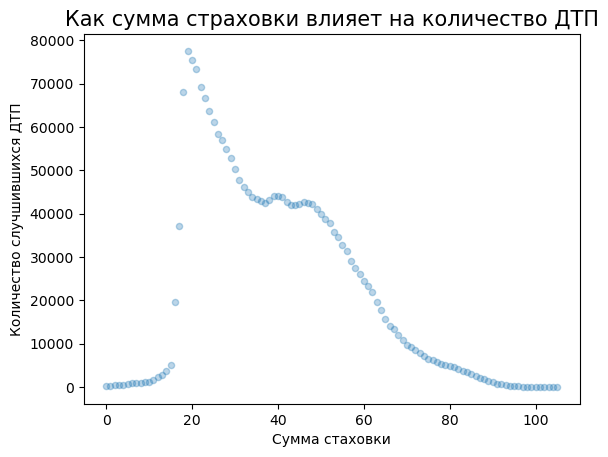

In [53]:
query11.plot(x='insurance_premium', y='count', kind='scatter', alpha=0.3) 
plt.xlabel('Сумма стаховки')
plt.ylabel('Количество случшившихся ДТП')
plt.title('Как сумма страховки влияет на количество ДТП', fontsize=15)

***Вывод:***
 
Получается, что водители с очень низкой суммой (менее 20 тыс. долл.) страховки и очень высокой (более 80 тыс.долл.) более аккуратны на дороге. 

## Создайте модель для оценки водительского риска

***Подготовим  набор данных на основе первичного предположения заказчика:***
 
- Выберем  тип виновника — только машина (car). **
- Возьмем случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
- Для моделирования возьмите данные только за 2012 год.
Подготовка исходной таблицы должна проводиться с помощью sql-запроса.

In [54]:
data = '''

SELECT EXTRACT(YEAR FROM c.COLLISION_DATE),
       c.county_city_location,
       c.county_location,
       c.distance,
       c.direction,
       c.intersection,
       c.weather_1,
       c.location_type,
       c.collision_damage,
       c.party_count,
       c.primary_collision_factor,
       c.pcf_violation_category,
       c.type_of_collision,
       c.motor_vehicle_involved_with,
       c.road_surface,
       c.road_condition_1,
       c.lighting,
       c.control_device,
       EXTRACT (MONTH FROM CAST(collision_date AS DATE)) AS data,
       c.collision_time,
       p.party_number,
       p.insurance_premium,
       p.party_sobriety,
       p.party_drug_physical,
       p.cellphone_in_use,
       p.at_fault,
       v.vehicle_type,
       v.vehicle_transmission,
       v.vehicle_age
FROM case_ids AS ci
INNER JOIN vehicles AS v ON ci.CASE_ID = v.CASE_ID
INNER JOIN collisions AS c ON ci.CASE_ID = c.CASE_ID
INNER JOIN parties AS p ON ci.CASE_ID = p.CASE_ID
WHERE p.PARTY_TYPE = 'car' AND c.COLLISION_DAMAGE != 'scratch' AND EXTRACT(YEAR FROM c.COLLISION_DATE) = 2012;

'''

data = pd.read_sql_query(data, con = engine)
data.head()

,date_part,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,...,collision_time,party_number,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,at_fault,vehicle_type,vehicle_transmission,vehicle_age
0,2012.0,3344,riverside,300.0,north,0.0,clear,highway,small damage,2,...,17:35:00,1,69.0,had not been drinking,None,0.0,1,sedan,manual,4.0
1,2012.0,3010,orange,36.0,north,0.0,raining,highway,small damage,2,...,11:07:00,1,19.0,had not been drinking,None,0.0,1,sedan,manual,0.0
2,2012.0,3010,orange,36.0,north,0.0,raining,highway,small damage,2,...,11:07:00,2,26.0,had not been drinking,None,0.0,0,sedan,manual,0.0
3,2012.0,4803,solano,387.0,west,0.0,clear,None,small damage,2,...,14:28:00,2,30.0,had not been drinking,None,0.0,0,sedan,auto,1.0
4,2012.0,4803,solano,387.0,west,0.0,clear,None,small damage,2,...,14:28:00,2,30.0,had not been drinking,None,0.0,0,sedan,auto,10.0


In [55]:
data.columns

Index(['date_part', 'county_city_location', 'county_location', 'distance',
       'direction', 'intersection', 'weather_1', 'location_type',
       'collision_damage', 'party_count', 'primary_collision_factor',
       'pcf_violation_category', 'type_of_collision',
       'motor_vehicle_involved_with', 'road_surface', 'road_condition_1',
       'lighting', 'control_device', 'data', 'collision_time', 'party_number',
       'insurance_premium', 'party_sobriety', 'party_drug_physical',
       'cellphone_in_use', 'at_fault', 'vehicle_type', 'vehicle_transmission',
       'vehicle_age'],
      dtype='object')

***Проведем первичный отбор факторов, необходимых для модели***.

Изучим описание факторов. Отберем те, которые могут влиять на вероятность ДТП, аргументируем свой выбор. 

## Анализ важности факторов ДТП

In [56]:
columns = ['date_part', #год просиествия, колонку удалим,так как отобраны все записи по 2012г.
           'county_city_location', #номер географических районов, где произошло ДТП - колонку 
                                   #удалим, вместо нее будет county_location.
           'county_location', #Названия географических районов, где произошло ДТП - колонка важна, 
                #так как в одних регионах ДТП случется чаще, мы это выяснили при анализе выше
           'distance',#Расстояние от главной дороги (метры) - удалим, на вероятность ДТП нет влияния.
           'direction',#Направление движения - удалим, более информативной будет колонкасounty_location
           'intersection', #Является ли место происшествие перекрёстком - удалим, так как дублирует смысл
                           #колонки location_type
           'weather_1', #Погода - оставим, необходимо акцинировать внимание водителя на повышенную
                        # в период тумана, снег, дождя.
           'location_type' #Тип дороги - влияет, при проезде определенных типов дорог есть свои риски
                           #об этом можно будет с помощью системы предупреждать водителя
           'collision_damage', #Серьёзность происшествия  - оставим, есть опасные участки дороге, где
                               #статистически больше ДТП
           'party_count', #Количество участников - удалим, эта информация не известна на момента, когда
                           #водитель садится в машину
           'primary_collision_factor', #Основной фактор аварии - оставим для статистики            
           'pcf_violation_category', #Категория нарушения -удалим, заранее неизвестна
           'type_of_collision', #Тип аварии -эта информация не известна на момента, когда
                               #водитель садится в машину, потому удалим
           'motor_vehicle_involved_with', #Дополнительные участники ДТП - удалим, эта информация не 
                                       #неизвестна на момента, когда водитель садится в машину
           'road_surface', #Состояние дороги - эта информация не известна на момента, когда
                               #водитель садится в машину, потому удалим
           'road_condition_1', #Дорожное состояние - оставим, влияет на вероятность ДТП и система может
                               # подбирать маршрут, где дорога более безопасна
           'lighting', #Освещение - удалим, также не известен на момента анализа, когда водитель сел в авто
           'control_device', #удалим, также не известен на момента анализа, когда водитель сел в авто
           'data', #дата - оставим, но формат преобразуем, где будут только месяц 
           'collision_time', #время просшествия - оставим для статистики, но преобразем в фомрат - утро, день, 
                           #вечер, ночь
           'party_number', #Номер участника происшествия - удалим, это не извесно заранее
           'insurance_premium', #Сумма страховк -важный фактор, его анализировали выше
           'party_sobriety', #Трезвость участника - оставим, влияет на ДТП
           'party_drug_physical', #Состояние участника: физическое или с учётом принятых лекарств - мы не можем 
                               #знать это, это личная информация о здоровье, это можно выяснить только 
                              #постфактум, поэтому удаляем
           'cellphone_in_use', #Наличие телефона в автомобиле (возможности разговаривать по громкой связи)
                               #удалим, будет ли человек говорить по телефону заранее не узнать
           'at_fault', #Виновность участника - это наш целевой признак
           'vehicle_type', #Тип кузова - оставим, на определнных по шабаритам авто, аварии могут случаться 
                           #чаще
           'vehicle_transmission',#Тип КПП - удалим - как как проводители анализ выше и выянили, что процент ДТП 
                               #по разным видам КПП примерно одинаков
           'vehicle_age'] #Возраст автомобиля (в годах) - оставим по просьбе заказчика.]озраст автомобиля (в годах) - оставим по просьбе заказчика.]


In [57]:
data = data[['county_location', 
             'weather_1',
             'location_type',
             'collision_damage',
             'primary_collision_factor',
             'road_condition_1',
             'data',
             'collision_time',
             'insurance_premium',
             'party_sobriety',
             'at_fault',
             'vehicle_type',
             'vehicle_age']]
data.head(3)

,county_location,weather_1,location_type,collision_damage,primary_collision_factor,road_condition_1,data,collision_time,insurance_premium,party_sobriety,at_fault,vehicle_type,vehicle_age
0,riverside,clear,highway,small damage,vehicle code violation,normal,1.0,17:35:00,69.0,had not been drinking,1,sedan,4.0
1,orange,raining,highway,small damage,vehicle code violation,normal,1.0,11:07:00,19.0,had not been drinking,1,sedan,0.0
2,orange,raining,highway,small damage,vehicle code violation,normal,1.0,11:07:00,26.0,had not been drinking,0,sedan,0.0


***Проведем статистическое исследование отобранных факторов.***

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118411 entries, 0 to 118410
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   county_location           118411 non-null  object 
 1   weather_1                 118022 non-null  object 
 2   location_type             55137 non-null   object 
 3   collision_damage          118411 non-null  object 
 4   primary_collision_factor  118147 non-null  object 
 5   road_condition_1          117843 non-null  object 
 6   data                      118411 non-null  float64
 7   collision_time            118283 non-null  object 
 8   insurance_premium         113289 non-null  float64
 9   party_sobriety            116682 non-null  object 
 10  at_fault                  118411 non-null  int64  
 11  vehicle_type              118411 non-null  object 
 12  vehicle_age               115046 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory us

Необходимо будет исправить тип следующих данных:

1) data - с float на int

2) insurance_premium - с float на int

3) vehicle_age - с float на int


In [59]:
data.describe()

,data,insurance_premium,at_fault,vehicle_age
count,118411.000000,113289.000000,118411.000000,115046.000000
mean,3.231617,38.624686,0.469686,4.908263
std,1.823816,16.355164,0.499082,3.266265
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,0.000000,3.000000
50%,3.000000,36.000000,0.000000,4.000000
75%,4.000000,50.000000,1.000000,7.000000
max,12.000000,105.000000,1.000000,161.000000


Есть аномалиив возрасте машин - 161 год, их надо посмотреть детальнее и исправить.

In [60]:
data.isnull().sum()

county_location                 0
weather_1                     389
location_type               63274
collision_damage                0
primary_collision_factor      264
road_condition_1              568
data                            0
collision_time                128
insurance_premium            5122
party_sobriety               1729
at_fault                        0
vehicle_type                    0
vehicle_age                  3365
dtype: int64

В данных много пропусков, удалнее всех делать нельзя иначе мы потеряем большую часть данных.

Что предлагается сделать:
 
1) в категориальыне значения заменить модой (стоблцы: weather_1, road_condition_1, party_sobriety, primary_collision_factor)

2) количественные данные в колонке vehicle_age заполним средними значениями,

3) В столбце insurance_premium можно заметить неких 3 моды - в районе 21, 43 и 65, однако наибольшее скопление данных лежит в диапазоне от 19 до 25, поэтому мы рандомно заполним nan значения этим диапазоном.

3) collision_time изменим тип данных и разделим время на интервалы.

***Работа с пропусками, аномалиями и типами данных***

In [61]:
# Заполним средним значением
for column in ['vehicle_age']:
    data[column] = data[column].fillna(np.mean(data[column]))

In [62]:
# Заполним диапазоном от 19 до 25
random.seed(10)
def premium_std(x):
    if not math.isnan(x):
        return x
    if math.isnan(x):
        return random.randint(19, 25)
    
data['insurance_premium'] = data['insurance_premium'].apply(premium_std)

In [63]:
data['location_type'] = data['location_type'].fillna('unknown')
data.dropna(inplace=True)

In [64]:
# Изменим тип данных на int
for column in ['data','insurance_premium']:
    data[column] = data[column].astype('int')

In [65]:
import statistics as st
# Заполним модой
for column in ['weather_1', 'road_condition_1', 'party_sobriety', 'primary_collision_factor']:
    data[column] = data[column].fillna(st.mode(data[column]))

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115569 entries, 0 to 118410
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   county_location           115569 non-null  object 
 1   weather_1                 115569 non-null  object 
 2   location_type             115569 non-null  object 
 3   collision_damage          115569 non-null  object 
 4   primary_collision_factor  115569 non-null  object 
 5   road_condition_1          115569 non-null  object 
 6   data                      115569 non-null  int32  
 7   collision_time            115569 non-null  object 
 8   insurance_premium         115569 non-null  int32  
 9   party_sobriety            115569 non-null  object 
 10  at_fault                  115569 non-null  int64  
 11  vehicle_type              115569 non-null  object 
 12  vehicle_age               115569 non-null  float64
dtypes: float64(1), int32(2), int64(1), object(9)

In [67]:
# Изменим тип данных на DT
data['collision_time'] = pd.to_datetime(data['collision_time'].astype('str'))

In [68]:
# Разделим время на интервалы

data['hour'] = data.collision_time.dt.hour

def time(x):
    if x < 6:
        return 'Ночь'
    elif x < 12:
        return 'Утро'
    elif x < 18:
        return 'День'
    return 'Вечер'

data['hour'] = data['hour'].apply(time)
del data['collision_time']

In [69]:
data.head()

,county_location,weather_1,location_type,collision_damage,primary_collision_factor,road_condition_1,data,insurance_premium,party_sobriety,at_fault,vehicle_type,vehicle_age,hour
0,riverside,clear,highway,small damage,vehicle code violation,normal,1,69,had not been drinking,1,sedan,4.0,День
1,orange,raining,highway,small damage,vehicle code violation,normal,1,19,had not been drinking,1,sedan,0.0,Утро
2,orange,raining,highway,small damage,vehicle code violation,normal,1,26,had not been drinking,0,sedan,0.0,Утро
3,solano,clear,unknown,small damage,vehicle code violation,normal,1,30,had not been drinking,0,sedan,1.0,День
4,solano,clear,unknown,small damage,vehicle code violation,normal,1,30,had not been drinking,0,sedan,10.0,День


***Проверка на наличие неявных дубликатов***

In [70]:
data['county_location'].unique()

array(['riverside', 'orange', 'solano', 'los angeles', 'san luis obispo',
       'san francisco', 'stanislaus', 'san bernardino', 'alameda',
       'san joaquin', 'nevada', 'fresno', 'sonoma', 'monterey', 'kern',
       'tehama', 'santa clara', 'sacramento', 'ventura', 'san diego',
       'san mateo', 'contra costa', 'merced', 'placer', 'tulare',
       'colusa', 'santa barbara', 'lake', 'el dorado', 'mariposa',
       'siskiyou', 'plumas', 'sutter', 'amador', 'santa cruz', 'kings',
       'imperial', 'tuolumne', 'inyo', 'del norte', 'marin', 'mendocino',
       'yuba', 'mono', 'shasta', 'napa', 'humboldt', 'san benito', 'yolo',
       'madera', 'butte', 'lassen', 'trinity', 'calaveras', 'sierra',
       'glenn', 'alpine', 'modoc'], dtype=object)

In [71]:
data['weather_1'].unique()

array(['clear', 'raining', 'cloudy', 'fog', 'snowing', 'other', 'wind'],
      dtype=object)

In [72]:
data['location_type'].unique()

array(['highway', 'unknown', 'ramp', 'intersection'], dtype=object)

In [73]:
data['collision_damage'].unique()

array(['small damage', 'severe damage', 'middle damage', 'fatal'],
      dtype=object)

In [74]:
data['road_condition_1'].unique()

array(['normal', 'other', 'obstruction', 'construction', 'loose material',
       'flooded', 'holes', 'reduced width'], dtype=object)

In [75]:
data['data'].unique()

array([ 1,  2,  3,  4,  5, 12,  6,  8,  7,  9, 10, 11])

In [76]:
data['insurance_premium'].unique()

array([ 69,  19,  26,  30,  59,  18,  23,  24,  42,  29,  21,  63,  33,
        32,  47,  22,  68,  46,  34,  27,  31,  49,  70,  43,  39,  48,
        55,  41,  15,  20,  25,  64,  78,  53,  35,  40,  67,  44,  28,
        37,  17,  51,  45,  38,  74,  52,  58,  56,  57,  36,  62,  65,
        92,  54,  90,  50,  79,  66,  73,  60,  61,  85,  75,  14,  76,
        83,  16,  88,  81,  77,  72,  84,  71,  82,   0,  80,   7,  89,
        91,  86,  95,   9,  13,  87,   8,  10,   5, 101,  12,  93,  94,
        99,  97,  98,   4,  96,  11, 100,   2,   6, 102, 105])

In [77]:
data['party_sobriety'].unique()

array(['had not been drinking', 'impairment unknown',
       'had been drinking, under influence', 'not applicable',
       'had been drinking, not under influence',
       'had been drinking, impairment unknown'], dtype=object)

In [78]:
data['at_fault'].unique()

array([1, 0], dtype=int64)

In [79]:
#дисбаланс классов по целевому признаку
display(data['at_fault'].value_counts())

0    61458
1    54111
Name: at_fault, dtype: int64

In [80]:
data['vehicle_type'].unique()

array(['sedan', 'minivan', 'coupe', 'hatchback', 'other'], dtype=object)

In [81]:
data['vehicle_age'].unique()

array([  4.        ,   0.        ,   1.        ,  10.        ,
         8.        ,   6.        ,   3.        ,   2.        ,
         5.        ,  11.        ,   4.90826278,   9.        ,
         7.        ,  14.        ,  13.        ,  12.        ,
        15.        ,  16.        ,  19.        ,  17.        ,
       161.        ])

In [82]:
data['vehicle_age'].value_counts()
data['vehicle_age'] = data['vehicle_age'].astype('int')
#data['at_fault '] = data['at_fault '].astype('int')

In [83]:
#удалим аномалии с возрастом равным 161 году 

data = data.query('vehicle_age !=161')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115565 entries, 0 to 118410
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   county_location           115565 non-null  object
 1   weather_1                 115565 non-null  object
 2   location_type             115565 non-null  object
 3   collision_damage          115565 non-null  object
 4   primary_collision_factor  115565 non-null  object
 5   road_condition_1          115565 non-null  object
 6   data                      115565 non-null  int32 
 7   insurance_premium         115565 non-null  int32 
 8   party_sobriety            115565 non-null  object
 9   at_fault                  115565 non-null  int64 
 10  vehicle_type              115565 non-null  object
 11  vehicle_age               115565 non-null  int32 
 12  hour                      115565 non-null  object
dtypes: int32(3), int64(1), object(9)
memory usage: 11.0+ MB


***Тепловая карта корреляции***

Тепловая карта корреляции


<AxesSubplot:>

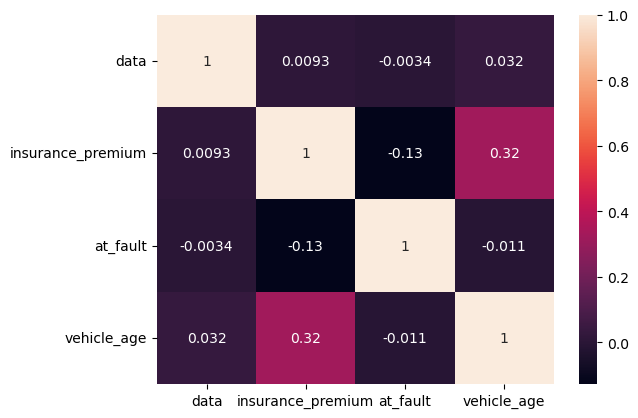

In [85]:
#построим тепловую карту корреляции  - проверим корреляцию данных 
print ('Тепловая карта корреляции')
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True)

***Вывод по статистическму анализу данных:***

При формировании финального датафрейма мы учли предположения заказчика:

 - Виновние ДТП - только машина (car);
 - Значимые поверждения автомобиля люые, кроме царапин (scratch);
 - Для моделирования взяты только данные за 2012 год.
 
Мы проанализировали все признаки в 3 связанных таблицах (подробный аналих сделан выше, повторно его приводить не буду), отобрали 12 тех, которые по нашему мнению могут помочь в разработке системы оценки риска ДТП.

У нас получилось 115565 наблюдения.  Наименование столбцов в порялке, баланс таргета в предлелах, неявных дубликатов нет. Мы исправили типы данных в признаках 'data','insurance_premium' на int.

Обработали пропуски:
1) в категориальных значения заменили модой (стоблцы: weather_1, road_condition_1, party_sobriety, primary_collision_factor)

2) количественные данные в колонке vehicle_age заполним средними значениями,

3) В столбце insurance_premium можно заметить неких 3 моды - в районе 21, 43 и 65, однако наибольшее скопление данных лежит в диапазоне от 19 до 25, поэтому мы рандомно заполним ими пропуски.


Построили тепловую карту корреляции, по ней между количественными признаками сильной корреляции не наблюдается.


***Проверка на наличие полных дубликатов после предобработки данных***

In [86]:
# КОД РЕВЬЮЕРА
data.duplicated().sum()

10083

In [87]:
#удаление полных дубликатов

data = data.drop_duplicates().reset_index(drop=True) 
print(data.duplicated().sum())


0


### Модель для оценки водительского риска

### Подготовка признаков

In [89]:

from sklearn.preprocessing import OneHotEncoder
_train_ohe, _test_ohe = train_test_split(data, random_state=42)
cat_features = [
    'primary_collision_factor', 'road_condition_1', 'vehicle_type', 'location_type', 'party_sobriety',
    'hour', 'weather_1', 'county_location', 'collision_damage'
]

ohe_encoder = OneHotEncoder(drop='first', sparse=False)

train_temp = ohe_encoder.fit_transform(_train_ohe[cat_features]) # обучили на трейне и сразу к нему применили
_train_ohe[ohe_encoder.get_feature_names()] = train_temp # вписали новые признаки
_train_ohe.drop(cat_features, axis=1, inplace=True) # удалили старые признаки

test_temp = ohe_encoder.transform(_test_ohe[cat_features]) # обученный энкодер применили к тест. выборке
_test_ohe[ohe_encoder.get_feature_names()] = test_temp # вписали новые признаки
_test_ohe.drop(cat_features, axis=1, inplace=True) # удалили старые признаки

_test_ohe.head()

,data,insurance_premium,at_fault,vehicle_age,x0_other improper driving,x0_other than driver,x0_unknown,x0_vehicle code violation,x1_flooded,x1_holes,...,x7_tehama,x7_trinity,x7_tulare,x7_tuolumne,x7_ventura,x7_yolo,x7_yuba,x8_middle damage,x8_severe damage,x8_small damage
3711,5,28,1,8,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23168,1,43,0,8,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95097,4,35,0,4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90186,3,21,1,4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10021,2,55,1,6,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


***Разделение на выборки***

In [90]:
RANDOM_STATE = 12345

In [91]:
# Разделим нашу выборку
# Разделим нашу выборку
X_train, X_test_valid, y_train, y_test_valid = train_test_split(data.drop('at_fault', axis=1),
                                                    data['at_fault'],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=12345)

X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid,
                                                    y_test_valid,
                                                    test_size=0.5,
                                                    shuffle=True,
                                                    random_state=12345)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(73837, 12) (73837,) (15823, 12) (15823,) (15822, 12) (15822,)


In [92]:
X_train

,county_location,weather_1,location_type,collision_damage,primary_collision_factor,road_condition_1,data,insurance_premium,party_sobriety,vehicle_type,vehicle_age,hour
51635,santa barbara,clear,highway,small damage,vehicle code violation,normal,3,18,had not been drinking,sedan,5,Утро
13383,los angeles,clear,unknown,middle damage,vehicle code violation,normal,4,46,had not been drinking,coupe,5,День
65474,los angeles,cloudy,unknown,small damage,vehicle code violation,normal,4,73,had not been drinking,sedan,6,День
48974,santa clara,cloudy,highway,small damage,vehicle code violation,construction,5,31,had not been drinking,sedan,2,Вечер
43925,sonoma,cloudy,unknown,small damage,vehicle code violation,normal,3,48,"had been drinking, under influence",sedan,2,День
...,...,...,...,...,...,...,...,...,...,...,...,...
4094,orange,clear,highway,small damage,vehicle code violation,normal,5,36,had not been drinking,sedan,3,Вечер
85412,los angeles,clear,unknown,small damage,vehicle code violation,normal,2,26,had not been drinking,sedan,4,Ночь
2177,sonoma,raining,highway,small damage,vehicle code violation,normal,3,25,had not been drinking,sedan,0,День
77285,mendocino,cloudy,unknown,small damage,vehicle code violation,normal,1,19,had not been drinking,sedan,4,День


***Кодирование качестdенных признаков техникой OHE***

In [93]:
#кодирование качеcтвенных переменных

cat_features = [
    'primary_collision_factor', 'road_condition_1', 'vehicle_type', 'location_type', 'party_sobriety',
    'hour', 'weather_1', 'county_location', 'collision_damage'
]

ohe_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')

train_temp = ohe_encoder.fit_transform(X_train[cat_features]) # обучили на трейне и сразу к нему применили
X_train[ohe_encoder.get_feature_names()] = train_temp # вписали новые признаки
X_train.drop(cat_features, axis=1, inplace=True) # удалили старые признаки

valid_temp = ohe_encoder.transform(X_valid[cat_features]) # обученный энкодер применили к тест. выборке
X_valid[ohe_encoder.get_feature_names()] = valid_temp # вписали новые признаки
X_valid.drop(cat_features, axis=1, inplace=True) # удалили старые признаки

test_temp = ohe_encoder.transform(X_test[cat_features]) # обученный энкодер применили к тест. выборке
X_test[ohe_encoder.get_feature_names()] = test_temp # вписали новые признаки
X_test.drop(cat_features, axis=1, inplace=True) # удалили старые признаки

X_test.head()

,data,insurance_premium,vehicle_age,x0_other improper driving,x0_other than driver,x0_unknown,x0_vehicle code violation,x1_flooded,x1_holes,x1_loose material,...,x7_tehama,x7_trinity,x7_tulare,x7_tuolumne,x7_ventura,x7_yolo,x7_yuba,x8_middle damage,x8_severe damage,x8_small damage
45859,1,19,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42597,3,67,14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33672,3,31,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90446,3,23,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2065,3,18,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


***Масштабирование признаков***

In [94]:
#масштабирование данных для моделей

#выделим количественные признаким

numeric=['data', 'insurance_premium', 'vehicle_age']
#создадим объект стандартизации и обучим его для моделей Л
scaler = StandardScaler()    
scaler.fit(X_train[numeric])

#сохраним преобразованные обучающую и тестовую  выборки в переменные
X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

features_train_scaled = scaler.transform(X_train[numeric])
features_valid_scaled = scaler.transform(X_valid[numeric])
features_test_scaled = scaler.transform(X_test[numeric])


pd.options.mode.chained_assignment = None

In [95]:
#сбросим индексы, чтобы в дальнейшем было проще сопостовлять данные в target и prediction

X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Поиск лучшей модели

Перед нами стоит задача бинарной классификации. Для такой задачи подойдут следующие  метрики оценки качества моделей: accuracy, precision, recall, f1-мера.
Accuracy показывает долю объектов, для которых правильно предсказан класс.
Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. Метрика F1 score - это средняя гармоническая между precision и recall.

Тк у нам необходимо угадать будет ли являться наш клиент виновником проишествия, а остальыне метрики хороши, когда рассматривваешь их в совокупности, то в качестве основной мы метркии мы выберем  f1.

Перейдем к постоению моделей с перебором гиперпараметров.

### 1 модель - Дерево решений

In [96]:
#модель
model = DecisionTreeClassifier(criterion='gini',random_state=RANDOM_STATE)

In [97]:
%%time
#параметры
parametrs = { 'max_depth': range (1,20, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)
            }
ftwo_scorer = make_scorer(fbeta_score, beta=2)
#запускаем обучение
grid = GridSearchCV(model, parametrs, cv=5, scoring = ftwo_scorer, verbose=3)
grid.fit(X_train, y_train)

#выводим результат
print(grid.best_params_)


Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.262 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.269 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.273 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.269 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.272 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.262 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.269 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.273 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.269 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=1,

In [98]:
#обучим модель по полученным параметрам
#model_dtc = DecisionTreeClassifier(criterion='gini', random_state=RANDOM_STATE, **grid.best_params_)
model_dtc = grid.best_estimator_
#предсказание и метрики модели на тестовых данных
predictions_valid1 = grid.best_estimator_.predict(X_valid)

recall_dtc = recall_score(y_valid, predictions_valid1)
precision_score_dtc = precision_score(y_valid, predictions_valid1)
f1_score_dtc = f1_score(y_valid, predictions_valid1)
fbeta_score_dtc= fbeta_score(y_valid, predictions_valid1, average='weighted', beta=2)

print('Полнота - доля правильных ответов из объектов положительного класса:', recall_dtc) 
print('Точность - доля правильных ответов из всех объектов класса:', precision_score_dtc) 
print('f1-мера - среднее гармоническое полноты и точности:', f1_score_dtc) 
print('F-бета - среднее гармоническое полноты и точности с уклоном на полноту:', fbeta_score_dtc) 

Полнота - доля правильных ответов из объектов положительного класса: 0.4723148765843896
Точность - доля правильных ответов из всех объектов класса: 0.6372637263726373
f1-мера - среднее гармоническое полноты и точности: 0.5425287356321838
F-бета - среднее гармоническое полноты и точности с уклоном на полноту: 0.6171544287898253


### 2 модель - Случайный лес

In [99]:
model = RandomForestClassifier(random_state=RANDOM_STATE, criterion='gini')

In [100]:
%%time
params = {
    'criterion':['gini'],
    'n_estimators': range (1,10, 2),
    'max_depth': range (1,20, 2),
    'min_samples_leaf': range (1,10,2),
    'class_weight': ['balanced']
                     
}
ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid = GridSearchCV(model,
                     params, cv = 5, scoring = ftwo_scorer,
                     verbose=3)
grid.fit(X_train, y_train)
#выводим результат
print(grid.best_params_)


Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.262 total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.269 total time=   0.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.273 total time=   0.0s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.269 total time=   0.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1;, score=0.272 total time=   0.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=3;, score=0.262 total time=   0.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=3;, score=0.270 total time=   0.0s
[CV 3

In [101]:
#обучим модель по получкнным параметрам
#model_rfc = RandomForestClassifier(random_state=RANDOM_STATE, **grid.best_params_)
model_rfc = grid.best_estimator_
#предсказание и метрики модели на тестовых данных
predictions_valid2 = grid.best_estimator_.predict(X_valid)

recall_rfc = recall_score(y_valid, predictions_valid2)
precision_score_rfc = precision_score(y_valid, predictions_valid2)
f1_score_rfc = f1_score(y_valid, predictions_valid2)
fbeta_score_rfc= fbeta_score(y_valid, predictions_valid2, average='weighted', beta=2)

#class_weight = 'balanced',
print('Полнота - доля правильных ответов из объектов положительного класса:', recall_rfc) 
print('Точность - доля правильных ответов из всех объектов класса:', precision_score_rfc) 
print('f1-мера - среднее гармоническое полноты и точности:', f1_score_rfc)
print('F-бета - среднее гармоническое полноты и точности с уклоном на полноту:', fbeta_score_rfc) 

Полнота - доля правильных ответов из объектов положительного класса: 0.46591060707138093
Точность - доля правильных ответов из всех объектов класса: 0.6805690898460339
f1-мера - среднее гармоническое полноты и точности: 0.5531443054015523
F-бета - среднее гармоническое полноты и точности с уклоном на полноту: 0.6355789010097973


### 3 модель - XGBClassifier

In [102]:
model_xgb = XGBClassifier(random_state=RANDOM_STATE)

In [103]:
%%time
param_test1 = {
 'max_depth':range (6,25, 4),
 'learning_rate': [0.1, 0.01],
 'n_estimators': (150,251, 50),
 #'eval_metric': ['logloss'],
 'gamma': [0.1, 0.2]
}
ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid = GridSearchCV(model_xgb, 
param_grid = param_test1, scoring=ftwo_scorer, cv=5, verbose = 3)
grid.fit(X_train, y_train)
#выводим результат
print(grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=150;, score=0.516 total time=   0.3s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=150;, score=0.528 total time=   0.3s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=150;, score=0.523 total time=   0.3s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=150;, score=0.522 total time=   0.3s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=150;, score=0.511 total time=   0.3s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=251;, score=0.522 total time=   0.5s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=251;, score=0.531 total time=   0.5s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=251;, score=0.529 total time=   0.5s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=251;, score=0.524 tot

In [104]:
#обучим модель по получкнным параметрам
#model_xgb = XGBClassifier(random_state=RANDOM_STATE, **grid.best_params_)

model_xgb = grid.best_estimator_
#предсказание и метрики модели на тестовых данных
predictions_valid3 = grid.best_estimator_.predict(X_valid)

recall_xgb = recall_score(y_valid, predictions_valid3)
precision_score_xgb = precision_score(y_valid, predictions_valid3)
f1_score_xgb = f1_score(y_valid, predictions_valid3)
fbeta_score_xgb= fbeta_score(y_valid, predictions_valid3, average='weighted', beta=2)


print('Полнота - доля правильных ответов из объектов положительного класса:', recall_xgb) 
print('Точность - доля правильных ответов из всех объектов класса:', precision_score_xgb) 
print('f1-мера - среднее гармоническое полноты и точности:', f1_score_xgb)
print('F-бета - среднее гармоническое полноты и точности с уклоном на полноту:', fbeta_score_xgb) 

Полнота - доля правильных ответов из объектов положительного класса: 0.5124749833222149
Точность - доля правильных ответов из всех объектов класса: 0.6476142303152925
f1-мера - среднее гармоническое полноты и точности: 0.5721733949054075
F-бета - среднее гармоническое полноты и точности с уклоном на полноту: 0.6332848308713628


### Cравнительная таблица по моделям

In [105]:
# Создание DataFrame с результатами
results = pd.DataFrame({'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier'],
                        'Recall': [recall_dtc, recall_rfc, recall_xgb],
                        'Precision': [precision_score_dtc, precision_score_rfc, precision_score_xgb],
                        'F1-score': [f1_score_dtc, f1_score_rfc, f1_score_xgb],
                        'F-бета':[fbeta_score_dtc, fbeta_score_rfc, fbeta_score_xgb],
                         'Learning time': ['7 m 45 s', '3 m 58 s', ' 5m 37 s']
                        })




# Вывод результатов
results

,Model,Recall,Precision,F1-score,F-бета,Learning time
0,DecisionTreeClassifier,0.472315,0.637264,0.542529,0.617154,7 m 45 s
1,RandomForestClassifier,0.465911,0.680569,0.553144,0.635579,3 m 58 s
2,XGBClassifier,0.512475,0.647614,0.572173,0.633285,5m 37 s


***ВЫБОР ЛУЧШЕЙ МОДЕЛИ:***

По F1 и скорости обучения лидирует модель RandomForestClassifier, ее F1 = 0.57816, далее следует модель XGBClassifier с F1 = 0.5784, на последнем месте модель Дерева решений с F1 = 0.5638, но эта модель обучается слишклм долго, поэтому от нее отказывается.

Сравнивая оставшиеся модели видим, что модель XGBClassifier обладает лучшими метриками и особенно метрикой F-бета. А так как наша цель при разработке модели - это оценка риска ДТП и прогнозирование наиболее безопасого маршрута - а тут лучше перестраховаться, чем недооценить риск.


Поэтому наилучшей будем считать модель XGB. 
Но если смотреть строго, то и эта модель не подхожит, так как ее метрики все в целом очень низкие, можно скахать на уровне предсказания монеткой - орел или решка.

Поэтому на основе имеющихся признаков создать адекватную модель оценки риска невозможно. Потому что для ее создания необходимо добавить признаков, которые будут оценивать личностые характеристики потенциального видителя, такие как: возраст, водительский стаж, история случаев ДТП (эта информация может хранится в профиле водителя при заключении договора), а сам водитель идентифицироваться по индивидуальному номеру. Также  состояние здоровья на момент посадки, проверка наличия алкогольного опьянения (возможность подышать  в трубку, чтобы это снималось в камеру в машине, чтобы избежать обмана).


## Проверка лучшей модели в работе на тестовой выборке

***Матрица ошибок и график полноты и точности для лучшей модели***

In [106]:
#Модель XGBClassifier

model_xgb = grid.best_estimator_
predictions_test = grid.best_estimator_.predict(X_test)
cm_xgb = confusion_matrix(y_test, predictions_test)

recall_xgb1 = recall_score(y_test, predictions_test)
precision_score_xgb1 = precision_score(y_test, predictions_test)
f1_score_xgb1 = f1_score(y_test, predictions_test)
fbeta_score_xgb1= fbeta_score(y_test, predictions_test, average='weighted', beta=2)

cm_xgb_col = pd.DataFrame(cm_xgb, index=['Actually Not At Fault', 'Actually At Fault'],
                 columns=['Predicted Not At Fault', 'Predicted At Fault'])

print('Полнота - доля правильных ответов из объектов положительного класса:', recall_xgb1) 
print('Точность - доля правильных ответов из всех объектов класса:', precision_score_xgb1) 
print('f1-мера - среднее гармоническое полноты и точности:', f1_score_xgb1)
print('F-бета - среднее гармоническое полноты и точности с уклоном на полноту:', fbeta_score_xgb1) 

Полнота - доля правильных ответов из объектов положительного класса: 0.501160409556314
Точность - доля правильных ответов из всех объектов класса: 0.635121107266436
f1-мера - среднее гармоническое полноты и точности: 0.5602441816100725
F-бета - среднее гармоническое полноты и точности с уклоном на полноту: 0.6318117683861529


Метрики на тетсовой выборке лучше, чем на валидационной.

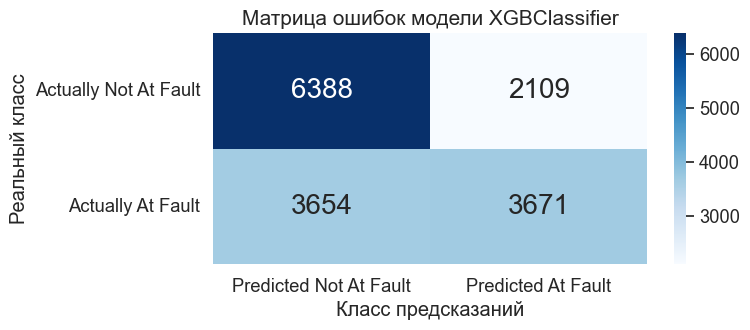

In [107]:
sns.set(font_scale=1.2)
plt.figure(figsize=(7,3))
    
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap="Blues",xticklabels=cm_xgb_col.columns, yticklabels=cm_xgb_col.index, annot_kws={"size": 20})
plt.title("Матрица ошибок модели XGBClassifier", size=15)
plt.xlabel('Класс предсказаний')
plt.ylabel('Реальный класс');

In [108]:
TP3 = cm_xgb[0][0]
TN3 = cm_xgb[1][1]
FP3 = cm_xgb[0][1]
FN3 = cm_xgb[1][0]
total = cm_xgb[0][0]+cm_xgb[1][1]+cm_xgb[0][1]+cm_xgb[1][0]

print('Всего предсказаний:',total)
print(f'Правильно классифицированные: {np.round((TP3+TN3)/total*100)}%')
print(f'Правильно классифицированная вина: {np.round(TP3/(TP3+FN3)*100)}%')
print(f'Правильно классифицированое отсутствие вины: {np.round(TN3/(TN3+FP3)*100)}%')
print(f'Прогнозируемая вина, соответствующая действительности: {np.round(TP3/(TP3+FP3)*100)}%')
print(f'Прогнозируемое отсутствие вины, которой так же на самом деле нет: {np.round(TN3/(TN3+FN3)*100)}%')

Всего предсказаний: 15822
Правильно классифицированные: 64.0%
Правильно классифицированная вина: 64.0%
Правильно классифицированое отсутствие вины: 64.0%
Прогнозируемая вина, соответствующая действительности: 75.0%
Прогнозируемое отсутствие вины, которой так же на самом деле нет: 50.0%


***Вывод:***

По матрице видно, что выбранная модель XGB хорошо предсказывает отсутствие вины, но когда есть риск попасть в ДТП такие случаи они предсказывает почти 50/50. Нам же нужно доработать модель с помощью новых признаков, чтобы риски ДТП предсказывался лучше.


***График полноты и точности лучшей модели - XGBClassifier***

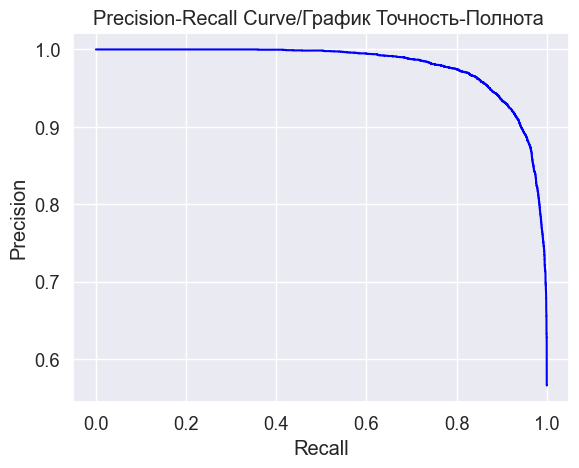

In [109]:
#график точноти и полноты млжеди №3 - XGB
model_xgb.fit(X_test, y_test)
probabilities_test = model_xgb.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probabilities_test[:, 1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve/График Точность-Полнота ')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show() 

Чем выше график, тем лучше работает модель, у нас он пологий, нужна дорабока модели.


***Основные факторы, влияющие на ДТП. Дополнительное исследования одного из факторов.***

In [110]:
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_valid, check_additivity=False)

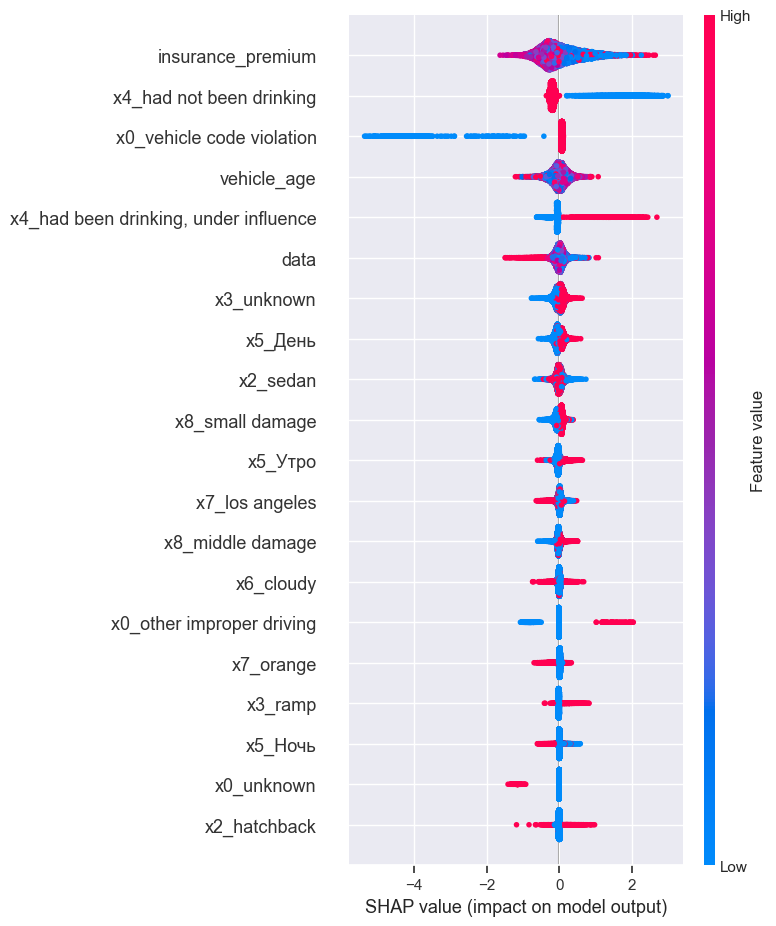

In [111]:
shap.summary_plot(shap_values, X_valid)

По диаграмме, визуализирующей все SHAP‑значения для каждого признака, можно заметить, что наибольшее влияние на риск ДТП из имеющихся в модели признаков оказывает трезвость водителя (PARTY_SOBRIETY).

Покажем на графике зависимость трезвости водителя от того был он виновен в ДТП или нет. По базе данных видим, что у нас есть несколько  уровней трезвости, поэтому для визуализации зависимости будем использовать столбчатую диагрумму.

In [112]:
#для постооения диаграммы обратимся к базе данныз SQL

query12 = '''

SELECT p.party_sobriety,
       p.at_fault,
       COUNT(c.case_id)
FROM collisions AS c
INNER JOIN parties AS p ON c.CASE_ID = p.CASE_ID
WHERE p.PARTY_TYPE = 'car' AND c.COLLISION_DAMAGE != 'scratch' AND EXTRACT(YEAR FROM c.COLLISION_DATE) = 2012
GROUP BY p.party_sobriety, p.at_fault;
'''

query12 = pd.read_sql_query(query12, con = engine)
query12

,party_sobriety,at_fault,count
0,"had been drinking, impairment unknown",0,275
1,"had been drinking, impairment unknown",1,1431
2,"had been drinking, not under influence",0,381
3,"had been drinking, not under influence",1,972
4,"had been drinking, under influence",0,440
5,"had been drinking, under influence",1,9830
6,had not been drinking,0,86978
7,had not been drinking,1,70706
8,impairment unknown,0,3581
9,impairment unknown,1,16944


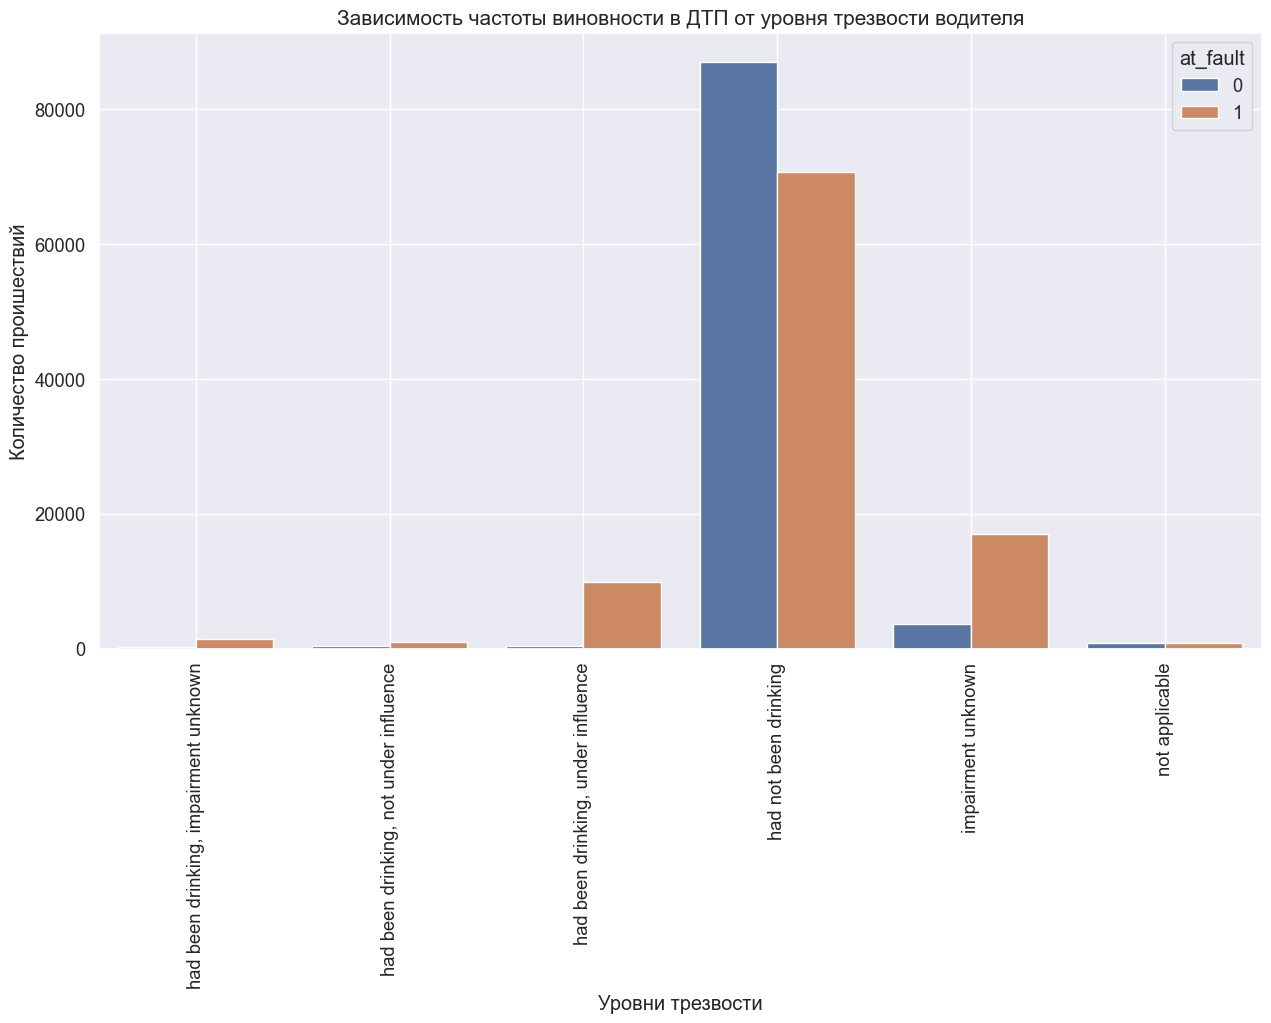

In [113]:
plt.figure(figsize=(15, 8))
sns.barplot(data=query12, x="party_sobriety", y="count", hue = "at_fault")
plt.title('Зависимость частоты виновности в ДТП от уровня трезвости водителя', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Уровни трезвости')
plt.ylabel('Количество проишествий')
plt.grid(True)
plt.show()

***Вывод по диаграмме:***

Мы видим, что большое большее количесвто ДТП случается в водителями в трезвом состоянии, потом идут случаи, когда состояние водителя неизвестно.

На третьем месте по количеству ДТП - случаи, когда водитель находился в состоянии алкогольного опьянения. Причем, что важно, при этом в 95,7% случев водитель был виновен  в аварии.

ПОэтому это важный фактов, влияющий на риск ДТП. Чтобы его учесть можно оборудовать авто системой проверки состояния водителя  с обязаностью "подышать в рубочку", при этом процесс надо  записывать на камеру.

## Выводы

- Общий вывод по модели
- Краткое описание лучшей модели
- Вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
- Какие факторы ещё необходимо собирать, чтобы улучшить модель?



- Мы провели обучение трех моделей - Дерева решений, Случайного леса и XGB. Отбор лучшей модели проходил исходя из качеств  метрик F1 score и времени, необходимого на обучение.

- Лучшей оказалась модель XGB - ее F1 = 0.6080, в время обучения 5 минут, 17 секунд. Однако нельзя сказать, что эта модель готова к работе, потому что надо добавить больше признаков, анализирующих личность водителя чтобы повысить качество предсказания.

- Думаем, что создание адекватной системы возможно, но не основе имеющихся признаков. Для этого необходимо добавить признаков, которые будут оценивать личностые характеристики потенциального видителя, такие как: возраст, водительский стаж, история случаев ДТП (эта информация может хранится в профиле водителя при заключении договора), а сам водитель идентифицироваться по индивидуальному номеру. Также  состояние здоровья на момент посадки, проверка наличия алкогольного опьянения (возможность подышать  в трубку, чтобы это снималось в камеру).


